In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
os.chdir('/home2/s439906/project/CASP16/monomer/')

In [2]:
raw_data_path = './monomer_data_final/raw_data/'
files = [file for file in os.listdir(raw_data_path) if file.endswith('.csv') and file.startswith('T1')]
files = sorted(files)

In [7]:
GDT_HA_mean_dict = {}
for file in files:
    EU = file.split('.')[0]
    data = pd.read_csv(raw_data_path + file, index_col=0)
    gdt_ha = data[['GDT_HA']]
    # group id is the 3 digits after TS in the index
    group_id = data.index.str.extract(r'TS(\d{3})').values.flatten()
    # add TS to the group id
    group_id = 'TS' + group_id
    # add the group id to the data
    gdt_ha['group_id'] = group_id
    # get the mean value for the same group
    gdt_ha = gdt_ha.groupby('group_id').mean().to_dict()['GDT_HA']
    GDT_HA_mean_dict[EU] = gdt_ha
GDT_HA_mean_dict

<ipython-input-7-169dd45d30d9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdt_ha['group_id'] = group_id


{'T1201-D1': {'TS014': 73.56400000000001,
  'TS015': 68.44500000000001,
  'TS017': 62.772000000000006,
  'TS019': 76.034,
  'TS022': 73.74600000000001,
  'TS028': 74.53800000000001,
  'TS031': 70.12,
  'TS040': 45.184,
  'TS049': 75.486,
  'TS051': 69.40500000000002,
  'TS052': 73.77600000000001,
  'TS059': 54.42199999999999,
  'TS075': 59.176,
  'TS079': 74.69200000000001,
  'TS085': 76.18599999999999,
  'TS091': 67.31800000000001,
  'TS110': 75.45599999999999,
  'TS112': 61.91600000000001,
  'TS114': 23.658,
  'TS117': 52.104,
  'TS120': 39.43166666666667,
  'TS122': 68.75,
  'TS132': 53.66,
  'TS138': 15.303999999999998,
  'TS139': 54.42199999999999,
  'TS145': 75.334,
  'TS147': 76.032,
  'TS148': 61.76800000000001,
  'TS163': 75.026,
  'TS164': 74.078,
  'TS167': 42.864,
  'TS174': 76.186,
  'TS191': 79.42,
  'TS196': 75.942,
  'TS198': 76.186,
  'TS204': 65.88199999999999,
  'TS208': 67.836,
  'TS212': 73.624,
  'TS218': 76.83,
  'TS219': 68.93199999999999,
  'TS221': 74.26400000

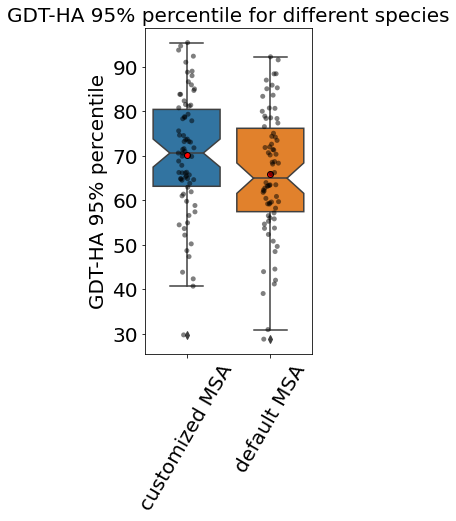

In [13]:
MSA_dict={'TS002': 'N/A',
 'TS003': 'N/A',
 'TS004': 'N/A',
 'TS005': 'N/A',
 'TS006': 'No MSA',
 'TS008': 'N/A',
 'TS014': 'Enhanced MSA',
 'TS015': 'Enhanced MSA',
 'TS016': 'N/A',
 'TS017': 'Use MSA',
 'TS018': 'N/A',
 'TS019': 'Enhanced MSA',
 'TS020': 'N/A',
 'TS022': 'Enhanced MSA',
 'TS023': 'Use MSA',
 'TS026': 'N/A',
 'TS027': 'Use MSA',
 'TS028': 'Enhanced MSA',
 'TS029': 'N/A',
 'TS030': 'Use MSA',
 'TS031': 'Use MSA',
 'TS032': 'N/A',
 'TS033': 'N/A',
 'TS039': 'No MSA',
 'TS040': 'Use MSA',
    'TS044': 'N/A',
 'TS049': 'N/A',
 'TS050': 'No MSA',
 'TS051': 'Enhanced MSA',
 'TS052': 'Enhanced MSA',
 'TS055': 'Use MSA',
 'TS059': 'Enhanced MSA',
 'TS063': 'No MSA',
 'TS074': 'Use MSA',
 'TS075': 'Use MSA',
 'TS077': 'No MSA',
 'TS079': 'Enhanced MSA',
 'TS080': 'Use MSA',
 'TS082': 'N/A',
 'TS084': 'N/A',
 'TS085': 'N/A',
 'TS088': 'Use MSA',
 'TS091': 'Enhanced MSA',
 'TS092': 'N/A',
 'TS094': 'Use MSA',
 'TS097': 'N/A',
 'TS100': 'N/A',
 'TS102': 'N/A',
 'TS105': 'No MSA',
 'TS110': 'Enhanced MSA',
 'TS112': 'Use MSA',
 'TS114': 'Use MSA',
 'TS117': 'Use MSA',
 'TS120': 'N/A',
 'TS121': 'No MSA',
 'TS122': 'No MSA',
 'TS128': 'N/A',
 'TS132': 'N/A',
 'TS135': 'Use MSA',
 'TS136': 'N/A',
 'TS137': 'N/A',
 'TS138': 'N/A',
 'TS139': 'Enhanced MSA',
 'TS143': 'N/A',
 'TS145': 'Use MSA',
 'TS147': 'Enhanced MSA',
 'TS148': 'Enhanced MSA',
 'TS156': 'No MSA',
 'TS159': 'N/A',
 'TS163': 'Use MSA',
 'TS164': 'Use MSA',
 'TS165': 'N/A',
 'TS167': 'Use MSA',
 'TS169': 'No MSA',
 'TS171': 'No MSA',
 'TS172': 'No MSA',
 'TS174': 'N/A',
 'TS177': 'Use MSA',
 'TS183': 'Use MSA',
 'TS187': 'Use MSA',
 'TS188': 'No MSA',
 'TS189': 'Use MSA',
 'TS191': 'Use MSA',
 'TS196': 'Enhanced MSA',
 'TS197': 'N/A',
 'TS198': 'N/A',
 'TS201': 'No MSA',
 'TS202': 'N/A',
 'TS204': 'N/A',
 'TS207': 'Enhanced MSA',
 'TS208': 'Use MSA',
 'TS209': 'N/A',
 'TS212': 'Use MSA',
 'TS217': 'N/A',
 'TS218': 'N/A',
 'TS219': 'Use MSA',
 'TS221': 'Enhanced MSA',
    'TS225': 'N/A',
 'TS226': 'No MSA',
 'TS227': 'Use MSA',
 'TS231': 'N/A',
 'TS235': 'Use MSA',
 'TS237': 'No MSA',
 'TS238': 'No MSA',
 'TS241': 'Use MSA',
 'TS261': 'Use MSA',
 'TS262': 'N/A',
 'TS264': 'Enhanced MSA',
 'TS267': 'N/A',
 'TS269': 'N/A',
 'TS271': 'N/A',
 'TS272': 'Use MSA',
 'TS273': 'No MSA',
 'TS274': 'Use MSA',
 'TS275': 'N/A',
 'TS276': 'N/A',
 'TS281': 'N/A',
 'TS284': 'Enhanced MSA',
 'TS286': 'Enhanced MSA',
 'TS287': 'N/A',
 'TS290': 'N/A',
 'TS293': 'N/A',
 'TS294': 'Enhanced MSA',
 'TS295': 'No MSA',
 'TS298': 'N/A',
 'TS300': 'Use MSA',
 'TS301': 'Use MSA',
 'TS304': 'Use MSA',
 'TS306': 'Use MSA',
 'TS307': 'N/A',
 'TS308': 'N/A',
 'TS309': 'No MSA',
 'TS311': 'N/A',
 'TS312': 'N/A',
 'TS314': 'Enhanced MSA',
 'TS317': 'N/A',
 'TS319': 'Enhanced MSA',
 'TS322': 'Use MSA',
 'TS323': 'N/A',
 'TS325': 'N/A',
 'TS331': 'Enhanced MSA',
 'TS337': 'Use MSA',
 'TS338': 'Use MSA',
 'TS345': 'Enhanced MSA',
 'TS349': 'No MSA',
 'TS351': 'N/A',
 'TS353': 'No MSA',
 'TS355': 'N/A',
 'TS357': 'N/A',
 'TS358': 'Enhanced MSA',
 'TS361': 'N/A',
 'TS363': 'No MSA',
 'TS367': 'N/A',
 'TS369': 'Enhanced MSA',
 'TS370': 'N/A',
 'TS375': 'N/A',
 'TS376': 'N/A',
 'TS380': 'N/A',
 'TS384': 'N/A',
 'TS386': 'N/A',
 'TS388': 'Enhanced MSA',
 'TS391': 'No MSA',
 'TS393': 'Use MSA',
 'TS397': 'N/A',
 'TS400': 'N/A',
 'TS403': 'N/A',
 'TS408': 'Use MSA',
 'TS412': 'N/A',
 'TS416': 'N/A',
 'TS417': 'Use MSA',
 'TS418': 'N/A',
 'TS419': 'Enhanced MSA',
 'TS420': 'No MSA',
 'TS423': 'N/A',
 'TS425': 'Enhanced MSA',
 'TS432': 'No MSA',
 'TS435': 'Use MSA',
 'TS436': 'N/A',
 'TS439': 'N/A',
 'TS441': 'Use MSA',
 'TS443': 'No MSA',
 'TS446': 'Use MSA',
 'TS447': 'N/A',
 'TS448': 'No MSA',
 'TS450': 'Use MSA',
 'TS456': 'Enhanced MSA',
 'TS461': 'N/A',
 'TS462': 'Enhanced MSA',
 'TS464': 'Use MSA',
 'TS465': 'Enhanced MSA',
 'TS466': 'No MSA',
 'TS468': 'N/A',
 'TS469': 'No MSA',
 'TS471': 'Use MSA',
 'TS474': 'N/A',
 'TS475': 'N/A',
 'TS476': 'No MSA',
 'TS481': 'Use MSA',
 'TS485': 'No MSA',
 'TS489': 'Use MSA',
 'TS494': 'Use MSA',
 'TS496': 'No MSA'}

MSA_plot_dict = {'customized MSA': [], 'default MSA': []}

for EU, gdt_ha_dict in GDT_HA_mean_dict.items():
    customized_msa_list = []
    default_msa_list = []
    for group, gdt_ha in gdt_ha_dict.items():
        if group in MSA_dict:
            if MSA_dict[group] == 'Enhanced MSA':
                customized_msa_list.append(gdt_ha)
            elif MSA_dict[group] == 'Use MSA':
                default_msa_list.append(gdt_ha)
        else:
            print(f"{group} not in MSA_dict")
    customized_msa_gdt_ha = np.mean(customized_msa_list)
    default_msa_gdt_ha = np.mean(default_msa_list)
    MSA_plot_dict['customized MSA'].append(customized_msa_gdt_ha)
    MSA_plot_dict['default MSA'].append(default_msa_gdt_ha)
MSA_plot_dict

# plot boxplot using species_plot_dict
plt.figure(figsize=(3, 6))
sns.boxplot(data=[MSA_plot_dict['customized MSA'], MSA_plot_dict['default MSA']],
             notch=True,showmeans=True,meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})

sns.stripplot(data=[MSA_plot_dict['customized MSA'], MSA_plot_dict['default MSA']],
              color='black', alpha=0.5, jitter=True)
plt.xticks([0, 1, ], ['customized MSA', 'default MSA'], fontsize = 20, rotation=60)
plt.ylabel('GDT-HA 95% percentile', fontsize=20)
plt.yticks(fontsize=20)
plt.title('GDT-HA 95% percentile for different species', fontsize=20)
plt.show()

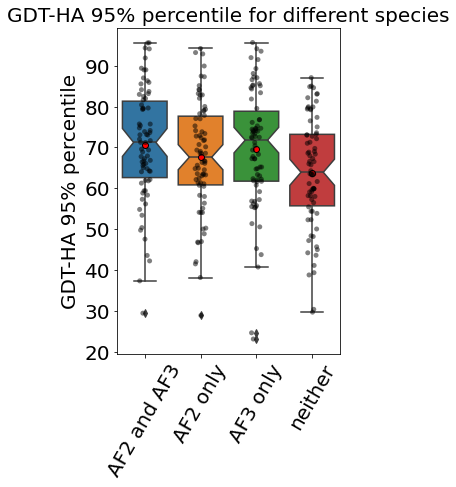

In [17]:
AF2_dict={'TS002': 'N/A',
 'TS003': 'N/A',
 'TS004': 'N/A',
 'TS005': 'N/A',
 'TS006': 'N',
 'TS008': 'N/A',
 'TS014': 'Y',
 'TS015': 'Y',
 'TS016': 'N/A',
 'TS017': 'N',
 'TS018': 'N/A',
 'TS019': 'Y',
 'TS020': 'N/A',
 'TS022': 'Y',
 'TS023': 'N',
 'TS026': 'N/A',
 'TS027': 'Y',
 'TS028': 'Y',
 'TS029': 'N/A',
 'TS030': 'Y',
 'TS031': 'Y',
 'TS032': 'N/A',
 'TS033': 'N/A',
 'TS039': 'N',
 'TS040': 'Y',
    'TS044': 'N/A',
 'TS049': 'N/A',
 'TS050': 'N',
 'TS051': 'Y',
 'TS052': 'Y',
 'TS055': 'N',
 'TS059': 'Y',
 'TS063': 'N',
 'TS074': 'Y',
 'TS075': 'Y',
 'TS077': 'N',
 'TS079': 'Y',
 'TS080': 'N',
 'TS082': 'N/A',
 'TS084': 'N/A',
 'TS085': 'N/A',
 'TS088': 'Y',
 'TS091': 'Y',
 'TS092': 'N/A',
 'TS094': 'N',
 'TS097': 'N/A',
 'TS100': 'N/A',
 'TS102': 'N/A',
 'TS105': 'N',
 'TS110': 'Y',
 'TS112': 'N',
 'TS114': 'Y',
 'TS117': 'Y',
 'TS120': 'N/A',
 'TS121': 'N',
 'TS122': 'N',
 'TS128': 'N/A',
 'TS132': 'N/A',
 'TS135': 'Y',
 'TS136': 'N/A',
 'TS137': 'N/A',
 'TS138': 'N/A',
 'TS139': 'Y',
 'TS143': 'N/A',
 'TS145': 'Y',
 'TS147': 'Y',
 'TS148': 'Y',
 'TS156': 'N',
 'TS159': 'N/A',
 'TS163': 'Y',
 'TS164': 'Y',
 'TS165': 'N/A',
 'TS167': 'N',
 'TS169': 'N',
 'TS171': 'N',
 'TS172': 'N',
 'TS174': 'N/A',
 'TS177': 'Y',
 'TS183': 'N',
 'TS187': 'Y',
 'TS188': 'N',
 'TS189': 'N',
 'TS191': 'Y',
 'TS196': 'N',
 'TS197': 'N/A',
 'TS198': 'N/A',
 'TS201': 'N',
 'TS202': 'N/A',
 'TS204': 'N/A',
 'TS207': 'Y',
 'TS208': 'N',
 'TS209': 'N/A',
 'TS212': 'Y',
 'TS217': 'N/A',
 'TS218': 'N/A',
 'TS219': 'Y',
 'TS221': 'Y',
    'TS225': 'N/A',
 'TS226': 'N',
 'TS227': 'Y',
 'TS231': 'N/A',
 'TS235': 'Y',
 'TS237': 'N',
 'TS238': 'N',
 'TS241': 'Y',
 'TS261': 'Y',
 'TS262': 'N/A',
 'TS264': 'Y',
 'TS267': 'N/A',
 'TS269': 'N/A',
 'TS271': 'N/A',
 'TS272': 'N',
 'TS273': 'N',
 'TS274': 'Y',
 'TS275': 'N/A',
 'TS276': 'N/A',
 'TS281': 'N/A',
 'TS284': 'Y',
 'TS286': 'Y',
 'TS287': 'N/A',
 'TS290': 'N/A',
 'TS293': 'N/A',
 'TS294': 'Y',
 'TS295': 'N',
 'TS298': 'N/A',
 'TS300': 'Y',
 'TS301': 'Y',
 'TS304': 'N',
 'TS306': 'N',
 'TS307': 'N/A',
 'TS308': 'N/A',
 'TS309': 'N',
 'TS311': 'N/A',
 'TS312': 'N/A',
 'TS314': 'Y',
 'TS317': 'N/A',
 'TS319': 'Y',
 'TS322': 'Y',
 'TS323': 'N/A',
 'TS325': 'N/A',
 'TS331': 'Y',
 'TS337': 'Y',
 'TS338': 'N',
 'TS345': 'Y',
 'TS349': 'N',
 'TS351': 'N/A',
 'TS353': 'N',
 'TS355': 'N/A',
 'TS357': 'N/A',
 'TS358': 'Y',
 'TS361': 'N/A',
 'TS363': 'N',
 'TS367': 'N/A',
 'TS369': 'Y',
 'TS370': 'N/A',
 'TS375': 'N/A',
 'TS376': 'N/A',
 'TS380': 'N/A',
 'TS384': 'N/A',
 'TS386': 'N/A',
 'TS388': 'Y',
 'TS391': 'N',
 'TS393': 'Y',
 'TS397': 'N/A',
 'TS400': 'N/A',
 'TS403': 'N/A',
 'TS408': 'Y',
 'TS412': 'N/A',
 'TS416': 'N/A',
 'TS417': 'N',
 'TS418': 'N/A',
 'TS419': 'Y',
 'TS420': 'N',
 'TS423': 'N/A',
 'TS425': 'Y',
 'TS432': 'N',
 'TS435': 'N',
 'TS436': 'N/A',
 'TS439': 'N/A',
 'TS441': 'Y',
 'TS443': 'N',
 'TS446': 'N',
 'TS447': 'N/A',
 'TS448': 'N',
 'TS450': 'N',
 'TS456': 'Y',
 'TS461': 'N/A',
 'TS462': 'Y',
 'TS464': 'Y',
 'TS465': 'Y',
 'TS466': 'N',
 'TS468': 'N/A',
 'TS469': 'N',
 'TS471': 'N',
 'TS474': 'N/A',
 'TS475': 'N/A',
 'TS476': 'N',
 'TS481': 'N',
 'TS485': 'N',
 'TS489': 'Y',
 'TS494': 'Y',
 'TS496': 'Y'}

AF3_dict = {'TS002': 'N/A',
 'TS003': 'N/A',
 'TS004': 'N/A',
 'TS005': 'N/A',
 'TS006': 'Y',
 'TS008': 'N/A',
 'TS014': 'N',
 'TS015': 'N',
 'TS016': 'N/A',
 'TS017': 'N',
 'TS018': 'N/A',
 'TS019': 'N',
 'TS020': 'N/A',
 'TS022': 'Y',
 'TS023': 'N',
 'TS026': 'N/A',
 'TS027': 'N',
 'TS028': 'N',
 'TS029': 'N/A',
 'TS030': 'N',
 'TS031': 'N',
 'TS032': 'N/A',
 'TS033': 'N/A',
 'TS039': 'N',
 'TS040': 'N',
    'TS044': 'N/A',
 'TS049': 'N/A',
 'TS050': 'N',
 'TS051': 'Y',
 'TS052': 'Y',
 'TS055': 'Y',
 'TS059': 'N',
 'TS063': 'N',
 'TS074': 'N',
 'TS075': 'Y',
 'TS077': 'N',
 'TS079': 'N',
 'TS080': 'N',
 'TS082': 'N/A',
 'TS084': 'N/A',
 'TS085': 'N/A',
 'TS088': 'N',
 'TS091': 'Y',
 'TS092': 'N/A',
 'TS094': 'Y',
 'TS097': 'N/A',
 'TS100': 'N/A',
 'TS102': 'N/A',
 'TS105': 'N',
 'TS110': 'N',
 'TS112': 'N',
 'TS114': 'N',
 'TS117': 'N',
 'TS120': 'N/A',
 'TS121': 'N',
 'TS122': 'N',
 'TS128': 'N/A',
 'TS132': 'N/A',
 'TS135': 'N',
 'TS136': 'N/A',
 'TS137': 'N/A',
 'TS138': 'N/A',
 'TS139': 'N',
 'TS143': 'N/A',
 'TS145': 'N',
 'TS147': 'N',
 'TS148': 'Y',
 'TS156': 'Y',
 'TS159': 'N/A',
 'TS163': 'N',
 'TS164': 'Y',
 'TS165': 'N/A',
 'TS167': 'N',
 'TS169': 'N',
 'TS171': 'N',
 'TS172': 'N',
 'TS174': 'N/A',
 'TS177': 'N',
 'TS183': 'Y',
 'TS187': 'N',
 'TS188': 'N',
 'TS189': 'Y',
 'TS191': 'Y',
 'TS196': 'N',
 'TS197': 'N/A',
 'TS198': 'N/A',
 'TS201': 'N',
 'TS202': 'N/A',
 'TS204': 'N/A',
 'TS207': 'Y',
 'TS208': 'Y',
 'TS209': 'N/A',
 'TS212': 'N',
 'TS217': 'N/A',
 'TS218': 'N/A',
 'TS219': 'N',
 'TS221': 'N',
    'TS225': 'N/A',
 'TS226': 'N',
 'TS227': 'N',
 'TS231': 'N/A',
 'TS235': 'Y',
 'TS237': 'N',
 'TS238': 'Y',
 'TS241': 'Y',
 'TS261': 'Y',
 'TS262': 'N/A',
 'TS264': 'Y',
 'TS267': 'N/A',
 'TS269': 'N/A',
 'TS271': 'N/A',
 'TS272': 'Y',
 'TS273': 'N',
 'TS274': 'Y',
 'TS275': 'N/A',
 'TS276': 'N/A',
 'TS281': 'N/A',
 'TS284': 'N',
 'TS286': 'Y',
 'TS287': 'N/A',
 'TS290': 'N/A',
 'TS293': 'N/A',
 'TS294': 'Y',
 'TS295': 'N',
 'TS298': 'N/A',
 'TS300': 'N',
 'TS301': 'Y',
 'TS304': 'Y',
 'TS306': 'Y',
 'TS307': 'N/A',
 'TS308': 'N/A',
 'TS309': 'N',
 'TS311': 'N/A',
 'TS312': 'N/A',
 'TS314': 'Y',
 'TS317': 'N/A',
 'TS319': 'Y',
 'TS322': 'N',
 'TS323': 'N/A',
 'TS325': 'N/A',
 'TS331': 'Y',
 'TS337': 'N',
 'TS338': 'Y',
 'TS345': 'Y',
 'TS349': 'N',
 'TS351': 'N/A',
 'TS353': 'N',
 'TS355': 'N/A',
 'TS357': 'N/A',
 'TS358': 'N',
 'TS361': 'N/A',
 'TS363': 'N',
 'TS367': 'N/A',
 'TS369': 'Y',
 'TS370': 'N/A',
 'TS375': 'N/A',
 'TS376': 'N/A',
 'TS380': 'N/A',
 'TS384': 'N/A',
 'TS386': 'N/A',
 'TS388': 'N',
 'TS391': 'N',
 'TS393': 'N',
 'TS397': 'N/A',
 'TS400': 'N/A',
 'TS403': 'N/A',
 'TS408': 'N',
 'TS412': 'N/A',
 'TS416': 'N/A',
 'TS417': 'Y',
 'TS418': 'N/A',
 'TS419': 'Y',
 'TS420': 'Y',
 'TS423': 'N/A',
 'TS425': 'Y',
 'TS432': 'N',
 'TS435': 'N',
 'TS436': 'N/A',
 'TS439': 'N/A',
 'TS441': 'N',
 'TS443': 'N',
 'TS446': 'N',
 'TS447': 'N/A',
 'TS448': 'N',
 'TS450': 'N',
 'TS456': 'Y',
 'TS461': 'N/A',
 'TS462': 'N',
 'TS464': 'N',
 'TS465': 'N',
 'TS466': 'N',
 'TS468': 'N/A',
 'TS469': 'N',
 'TS471': 'N',
 'TS474': 'N/A',
 'TS475': 'N/A',
 'TS476': 'N',
 'TS481': 'Y',
 'TS485': 'N',
 'TS489': 'Y',
 'TS494': 'Y',
 'TS496': 'N'}

AF2_AF3_dict = {'AF2 and AF3': [], 'AF2 only': [], 'AF3 only': [], 'neither': []}


for EU, gdt_ha_dict in GDT_HA_mean_dict.items():
    AF2_AF3_list = []
    AF2_only_list = []
    AF3_only_list = []
    neither_list = []
    for group, gdt_ha in gdt_ha_dict.items():
        if AF2_dict[group] == 'Y' and AF3_dict[group] == 'Y':
            AF2_AF3_list.append(gdt_ha)
        elif AF2_dict[group] == 'Y' and AF3_dict[group] == 'N':
            AF2_only_list.append(gdt_ha)
        elif AF2_dict[group] == 'N' and AF3_dict[group] == 'Y':
            AF3_only_list.append(gdt_ha)
        else:
            neither_list.append(gdt_ha)
    AF2_AF3_gdt_ha = np.mean(AF2_AF3_list)
    AF2_only_gdt_ha = np.mean(AF2_only_list)
    AF3_only_gdt_ha = np.mean(AF3_only_list)
    neither_gdt_ha = np.mean(neither_list)
    AF2_AF3_dict['AF2 and AF3'].append(AF2_AF3_gdt_ha)
    AF2_AF3_dict['AF2 only'].append(AF2_only_gdt_ha)
    AF2_AF3_dict['AF3 only'].append(AF3_only_gdt_ha)
    AF2_AF3_dict['neither'].append(neither_gdt_ha)
AF2_AF3_dict

plt.figure(figsize=(4, 6))
sns.boxplot(data=[AF2_AF3_dict['AF2 and AF3'], AF2_AF3_dict['AF2 only'], AF2_AF3_dict['AF3 only'], AF2_AF3_dict['neither']],
            notch=True, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})

sns.stripplot(data=[AF2_AF3_dict['AF2 and AF3'], AF2_AF3_dict['AF2 only'], AF2_AF3_dict['AF3 only'], AF2_AF3_dict['neither']],
              color='black', alpha=0.5, jitter=True)
plt.xticks([0, 1, 2, 3], ['AF2 and AF3', 'AF2 only', 'AF3 only', 'neither'], fontsize=20, rotation=60)
plt.ylabel('GDT-HA 95% percentile', fontsize=20)
plt.yticks(fontsize=20)
plt.title('GDT-HA 95% percentile for different species', fontsize=20)
plt.show()

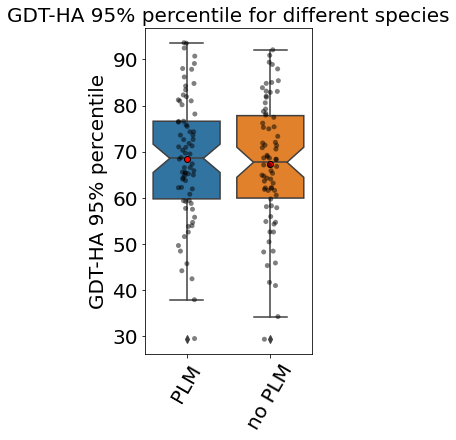

In [21]:
PLM_dict={'TS002': 'N/A',
 'TS003': 'N/A',
 'TS004': 'N/A',
 'TS005': 'N/A',
 'TS006': 'N',
 'TS008': 'N/A',
 'TS014': 'N',
 'TS015': 'Y',
 'TS016': 'N/A',
 'TS017': 'N',
 'TS018': 'N/A',
 'TS019': 'Y',
 'TS020': 'N/A',
 'TS022': 'N',
 'TS023': 'N',
 'TS026': 'N/A',
 'TS027': 'N',
 'TS028': 'Y',
 'TS029': 'N/A',
 'TS030': 'N',
 'TS031': 'N',
 'TS032': 'N/A',
 'TS033': 'N/A',
 'TS039': 'N',
 'TS040': 'N',
    'TS044': 'N/A',
 'TS049': 'N/A',
 'TS050': 'N',
 'TS051': 'N',
 'TS052': 'N',
 'TS055': 'N',
 'TS059': 'Y',
 'TS063': 'N',
 'TS074': 'N',
 'TS075': 'N',
 'TS077': 'N',
 'TS079': 'N',
 'TS080': 'N',
 'TS082': 'N/A',
 'TS084': 'N/A',
 'TS085': 'N/A',
 'TS088': 'N',
 'TS091': 'N',
 'TS092': 'N/A',
 'TS094': 'N',
 'TS097': 'N/A',
 'TS100': 'N/A',
 'TS102': 'N/A',
 'TS105': 'N',
 'TS110': 'Y',
 'TS112': 'N',
 'TS114': 'Y',
 'TS117': 'N',
 'TS120': 'N/A',
 'TS121': 'N',
 'TS122': 'N',
 'TS128': 'N/A',
 'TS132': 'N/A',
 'TS135': 'N',
 'TS136': 'N/A',
 'TS137': 'N/A',
 'TS138': 'N/A',
 'TS139': 'Y',
 'TS143': 'N/A',
 'TS145': 'N',
 'TS147': 'Y',
 'TS148': 'Y',
 'TS156': 'N',
 'TS159': 'N/A',
 'TS163': 'N',
 'TS164': 'N',
 'TS165': 'N/A',
 'TS167': 'N',
 'TS169': 'N',
 'TS171': 'N',
 'TS172': 'N',
 'TS174': 'N/A',
 'TS177': 'N',
 'TS183': 'N',
 'TS187': 'N',
 'TS188': 'N',
 'TS189': 'N',
 'TS191': 'N',
 'TS196': 'Y',
 'TS197': 'N/A',
 'TS198': 'N/A',
 'TS201': 'N',
 'TS202': 'N/A',
 'TS204': 'N/A',
 'TS207': 'N',
 'TS208': 'N',
 'TS209': 'N/A',
 'TS212': 'N',
 'TS217': 'N/A',
 'TS218': 'N/A',
 'TS219': 'N',
 'TS221': 'N',
    'TS225': 'N/A',
 'TS226': 'N',
 'TS227': 'N',
 'TS231': 'N/A',
 'TS235': 'Y',
 'TS237': 'N',
 'TS238': 'N',
 'TS241': 'N',
 'TS261': 'N',
 'TS262': 'N/A',
 'TS264': 'N',
 'TS267': 'N/A',
 'TS269': 'N/A',
 'TS271': 'N/A',
 'TS272': 'Y',
 'TS273': 'N',
 'TS274': 'N',
 'TS275': 'N/A',
 'TS276': 'N/A',
 'TS281': 'N/A',
 'TS284': 'N',
 'TS286': 'N',
 'TS287': 'N/A',
 'TS290': 'N/A',
 'TS293': 'N/A',
 'TS294': 'N',
 'TS295': 'N',
 'TS298': 'N/A',
 'TS300': 'Y',
 'TS301': 'N',
 'TS304': 'N',
 'TS306': 'N',
 'TS307': 'N/A',
 'TS308': 'N/A',
 'TS309': 'N',
 'TS311': 'N/A',
 'TS312': 'N/A',
 'TS314': 'Y',
 'TS317': 'N/A',
 'TS319': 'N',
 'TS322': 'N',
 'TS323': 'N/A',
 'TS325': 'N/A',
 'TS331': 'N',
 'TS337': 'Y',
 'TS338': 'N',
 'TS345': 'N',
 'TS349': 'N',
 'TS351': 'N/A',
 'TS353': 'N',
 'TS355': 'N/A',
 'TS357': 'N/A',
 'TS358': 'N',
 'TS361': 'N/A',
 'TS363': 'N',
 'TS367': 'N/A',
 'TS369': 'Y',
 'TS370': 'N/A',
 'TS375': 'N/A',
 'TS376': 'N/A',
 'TS380': 'N/A',
 'TS384': 'N/A',
 'TS386': 'N/A',
 'TS388': 'Y',
 'TS391': 'N',
 'TS393': 'Y',
 'TS397': 'N/A',
 'TS400': 'N/A',
 'TS403': 'N/A',
 'TS408': 'N',
 'TS412': 'N/A',
 'TS416': 'N/A',
 'TS417': 'N',
 'TS418': 'N/A',
 'TS419': 'N',
 'TS420': 'N',
 'TS423': 'N/A',
 'TS425': 'N',
 'TS432': 'N',
 'TS435': 'N',
 'TS436': 'N/A',
 'TS439': 'N/A',
 'TS441': 'N',
 'TS443': 'N',
 'TS446': 'N',
 'TS447': 'N/A',
 'TS448': 'Y',
 'TS450': 'N',
 'TS456': 'N',
 'TS461': 'N/A',
 'TS462': 'Y',
 'TS464': 'N',
 'TS465': 'N',
 'TS466': 'N',
 'TS468': 'N/A',
 'TS469': 'N',
 'TS471': 'N',
 'TS474': 'N/A',
 'TS475': 'N/A',
 'TS476': 'N',
 'TS481': 'N',
 'TS485': 'N',
 'TS489': 'N',
 'TS494': 'N',
 'TS496': 'N'}

PLM_usage_dict = {'PLM': [], 'no PLM': []}

for EU, gdt_ha_dict in GDT_HA_mean_dict.items():
    PLM_list = []
    no_PLM_list = []
    for group, gdt_ha in gdt_ha_dict.items():
        if PLM_dict[group] == 'Y':
            PLM_list.append(gdt_ha)
        else:
            no_PLM_list.append(gdt_ha)
    PLM_gdt_ha = np.mean(PLM_list)
    no_PLM_gdt_ha = np.mean(no_PLM_list)
    PLM_usage_dict['PLM'].append(PLM_gdt_ha)
    PLM_usage_dict['no PLM'].append(no_PLM_gdt_ha)
PLM_usage_dict

plt.figure(figsize=(3, 6))
sns.boxplot(data=[PLM_usage_dict['PLM'], PLM_usage_dict['no PLM']],
            notch=True, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})

sns.stripplot(data=[PLM_usage_dict['PLM'], PLM_usage_dict['no PLM']],
              color='black', alpha=0.5, jitter=True)
plt.xticks([0, 1], ['PLM', 'no PLM'], fontsize=20, rotation=60)
plt.ylabel('GDT-HA 95% percentile', fontsize=20)
plt.yticks(fontsize=20)
plt.title('GDT-HA 95% percentile for different species', fontsize=20)
plt.show()